<a href="https://colab.research.google.com/github/mtxslv/EveryoneNeedsAHobbie/blob/master/VectorField.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the context of fluid mechanics, we define **velocity fields** in *eulerian framework* in order to understand the behaviour of the fluid body.

In this notebook I'll try plotting a velocity field that appeared in a homework activity. It's equation is pretty simple and is given as follows:
>$\overrightarrow{V} = (u,v) = (0.5+0.8x)\hat{i} + (1.5-0.8y)\hat{j}$

The purpose of the activity was very simple also. It asked "is there any point where the velocity is zero?". This point is called **stagnation point**. After some calculations, I've found it occurs at 
> $ \begin{bmatrix} x\\ y\\ \end{bmatrix} = \begin{bmatrix} -0.625\\ 1.875\\ \end{bmatrix} $

So, in this notebook I'll basically play around plotting this vector field, and try to see the stagnation point. Here we go!

We'll use [quiver](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.quiver.html) as vector plotting toolbox. In this first step of the code, I'll be using [one example](https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/quiver_simple_demo.html#sphx-glr-gallery-images-contours-and-fields-quiver-simple-demo-py).

We'll use some numpy functions, also. For example, it's important to manipulate domain values using [numpy.meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html).

In [0]:
# the submodule quiver in matplotlib.pyplot can plot vector fields. Let's import it!
from matplotlib import pyplot as plt
import numpy as np # useful for setting coordinating matrices and coordinating vectors

In [0]:
# let's build an script that constructs the plot we want to see.

def velocity_field(xmin,xmax,ymin,ymax,nx,ny):
  """
  Show vector field for the equation previously mentioned.
  Input: 
    limits in x-axis and y-axis
    quantity of arrows in x-axis and y-axis
  Output: None
  """
  # coordenate vectors
  x = np.linspace(xmin, xmax, nx)
  y = np.linspace(ymin, ymax, ny)

  # domain values
  X, Y = np.meshgrid(x,y)
  
  # generating the vector field itself
  U = 0.5*np.ones(X.shape) + 0.8*X
  V = 1.5*np.ones(Y.shape) - 0.8*Y
  
  # adding a new plot
  fig, ax = plt.subplots()
  ax.set_title("Velocity field")
  
  #generating and plotting the field
  q = ax.quiver(X, Y, U, V)


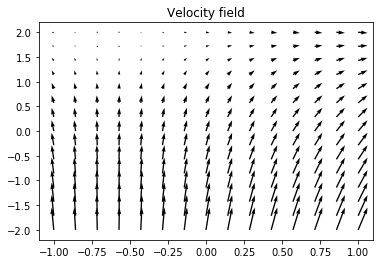

In [0]:
# let's try a canvas in [-1,1]x[-2,2] with 15x15 arrows
velocity_field(-1,1,-2,2,15,15)

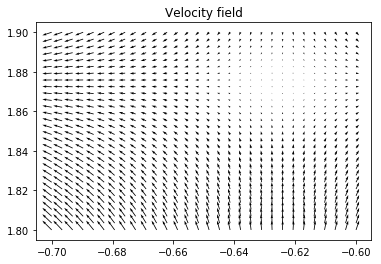

In [0]:
# what about a zoom in? Here we're looking at [-0.7,-0.6]x[1.8,1.9] control volume, with 30x30 arrows.
velocity_field(-0.7,-0.6,1.8,1.9,30,30)

Ok... using a 15x15 vector grid we can see that, as we approach the stagnation point, the vectors' magnitude goes zero. But, if we increase the number of vectors, the visualization goes wrong, and we got lost in the picture, without any valuable information about the magnitude of the field.

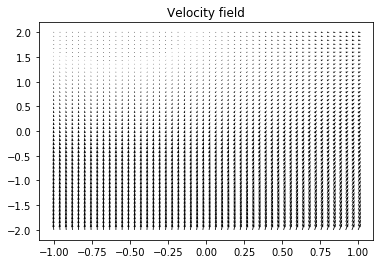

In [0]:
velocity_field(-1,1,-2,2,50,50)

In order to solve this visualization issue, let's look at [an example](https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/quiver_demo.html). I will calculate the magnitude of each vector and map it to a color. It will give us a good approach to understand what's happening to our field.

In [0]:
def colorful_velocity_field(xmin,xmax,ymin,ymax,nx,ny):
  """
  Show vector field for the equation previously mentioned.
  Input: 
    limits in x-axis and y-axis
    quantity of arrows in x-axis and y-axis
  Output: None
  """
  # coordenate vectors
  x = np.linspace(xmin, xmax, nx)
  y = np.linspace(ymin, ymax, ny)

  # domain values
  X, Y = np.meshgrid(x,y)
  
  # generating the vector field itself
  U = 0.5*np.ones(X.shape) + 0.8*X
  V = 1.5*np.ones(Y.shape) - 0.8*Y
  
  # calculating the magnitude of each vector
  M = np.hypot(U, V)
  
  # adding a new plot
  fig, ax = plt.subplots()
  ax.set_title("Colorful Velocity field")
  
  # generating and plotting the field
  q = ax.quiver(X, Y, U, V, M)


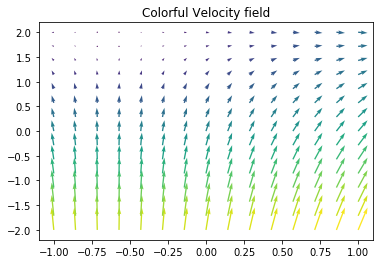

In [0]:
# let's try (again) a canvas in [-1,1]x[-2,2] with 15x15 arrows
colorful_velocity_field(-1,1,-2,2,15,15)

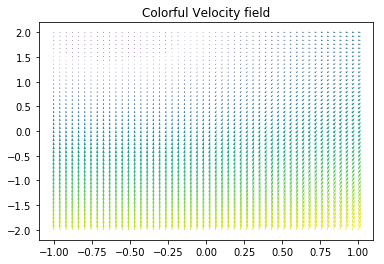

In [0]:
# increasing the resolution of the visualization
colorful_velocity_field(-1,1,-2,2,50,50)

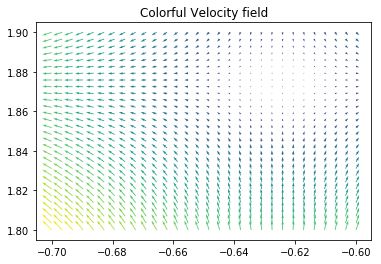

In [0]:
# a little bit of zoom
colorful_velocity_field(-0.7,-0.6,1.8,1.9,30,30)

Now we can see that, as we approach the stagnation point, the velocity goes zero. It's encoded in the color! The effect of stagnating is represented as the color going... purple? Dark blue? I can't say exactly... hehehehe